# Explore things we would want to put in GWAS viz


In [154]:
# import matplotlib
# matplotlib.use('TkAgg')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random


# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.5)


sns.set_style('white')

import sys

# for better labeling
import adjustText

# Part 1: Summary plots genome wide and per risk locus

Figures here are based on outputs from FUMA https://fuma.ctglab.nl/

- drop down menu to select risk locus to plot
- other filtering criteria which will update plots?

- some ideas are included below

In [242]:
basedir = '../FUMA_ASD_job58887/'
# focal_chr=d[d.rfind('_')+1:]
# print(focal_chr)
FUMA_SNPs_df = pd.read_csv(basedir+'snps.txt',sep='\t')

FUMA_SNPs_df.index=FUMA_SNPs_df['rsID']
focal_cols=['uniqID','chr','pos','rsID','non_effect_allele','effect_allele','MAF','gwasP','GenomicLocus','nearestGene',
               'dist','func','CADD','RDB','minChrState','commonChrState']
FUMA_SNPs_df = FUMA_SNPs_df[focal_cols]
FUMA_SNPs_df['negLogP']=-np.log10(FUMA_SNPs_df['gwasP'])
display(FUMA_SNPs_df.head())

uniqID  chr       pos         rsID non_effect_allele  \
rsID                                                                         
rs147787037   1:61871766:A:C    1  61871766  rs147787037                 C   
rs115460367   1:61874576:C:T    1  61874576  rs115460367                 C   
rs116320538   1:61876222:G:T    1  61876222  rs116320538                 G   
rs147926978  1:61876963:G:GA    1  61876963  rs147926978                 G   
rs116405282   1:61878848:A:T    1  61878848  rs116405282                 T   

            effect_allele      MAF     gwasP  GenomicLocus nearestGene dist  \
rsID                                                                          
rs147787037             A  0.04076  0.001114             1        NFIA    0   
rs115460367             T  0.03579  0.001360             1        NFIA    0   
rs116320538             T  0.03579  0.001291             1        NFIA    0   
rs147926978            GA  0.03579  0.001244             1        NFIA    0   
rs116405282             A  0.03579  0.001204             1        NFIA    0   

                 func    CADD  RDB  minChrState  commonChrState   negLogP  
rsID                                                                       
rs147787037  intronic   8.367    6            4               5  2.953115  
rs115460367  intronic   7.873    7            4               4  2.866461  
rs116320538  intronic   2.509    7            4               5  2.889074  
rs147926978  intronic  11.060  NaN            4              15  2.905180  
rs116405282  intronic  15.100    7            4               5  2.919374

In [243]:
print(FUMA_SNPs_df.columns)

Index(['uniqID', 'chr', 'pos', 'rsID', 'non_effect_allele', 'effect_allele',
       'MAF', 'gwasP', 'GenomicLocus', 'nearestGene', 'dist', 'func', 'CADD',
       'RDB', 'minChrState', 'commonChrState', 'negLogP'],
      dtype='object')


In [211]:
print(len(FUMA_SNPs_df))
FUMA_SNPs_df['GenomicLocus'].value_counts()

7174


66    3820
72     456
40     451
23     296
39     271
      ... 
62       1
60       1
61       1
18       1
48       1
Name: GenomicLocus, Length: 74, dtype: int64

In [212]:
FUMA_percent = FUMA_SNPs_df[['GenomicLocus','func']]
FUMA_percent['values']=1
# FUMA_percent=FUMA_percent.pivot(index='GenomicLocus', columns='func')['value']
# FUMA_percent = FUMA_percent.divide(FUMA_percent.sum(axis=1),axis='rows')


FUMA_percent=pd.pivot_table(FUMA_percent, index='func',columns='GenomicLocus',
               aggfunc='count')

# filter by loci with > 5 SNPs
FUMA_percent = FUMA_percent.T
FUMA_percent = FUMA_percent[FUMA_percent.T.sum()>20]

# FUMA_percent = FUMA_percent.T
# FUMA_percent = FUMA_percent.T.divide(FUMA_percent.T.sum(axis=1),axis='rows')
FUMA_percent=FUMA_percent.droplevel(level=0)
print(FUMA_percent.shape)

FUMA_percent['GenomicLocus']=FUMA_percent.index.tolist()
FUMA_percent.head()


(31, 10)


/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


func          UTR3  UTR5  downstream  exonic  intergenic  intronic  \
GenomicLocus                                                         
2              NaN   NaN         NaN     NaN        41.0       2.0   
5              NaN   NaN         NaN     NaN       123.0       NaN   
7              NaN   NaN         NaN     NaN        35.0       NaN   
8              NaN   NaN         NaN     NaN         1.0      25.0   
9              NaN   NaN         NaN     NaN        38.0       NaN   

func          ncRNA_exonic  ncRNA_intronic  upstream  upstream:downstream  \
GenomicLocus                                                                
2                      NaN             NaN       NaN                  NaN   
5                      NaN             NaN       NaN                  NaN   
7                      NaN             NaN       NaN                  NaN   
8                      NaN             6.0       NaN                  NaN   
9                      NaN             NaN       1.0                  NaN   

func          GenomicLocus  
GenomicLocus                
2                        2  
5                        5  
7                        7  
8                        8  
9                        9

In [213]:
FUMA_percent.head()

func          UTR3  UTR5  downstream  exonic  intergenic  intronic  \
GenomicLocus                                                         
2              NaN   NaN         NaN     NaN        41.0       2.0   
5              NaN   NaN         NaN     NaN       123.0       NaN   
7              NaN   NaN         NaN     NaN        35.0       NaN   
8              NaN   NaN         NaN     NaN         1.0      25.0   
9              NaN   NaN         NaN     NaN        38.0       NaN   

func          ncRNA_exonic  ncRNA_intronic  upstream  upstream:downstream  \
GenomicLocus                                                                
2                      NaN             NaN       NaN                  NaN   
5                      NaN             NaN       NaN                  NaN   
7                      NaN             NaN       NaN                  NaN   
8                      NaN             6.0       NaN                  NaN   
9                      NaN             NaN       1.0                  NaN   

func          GenomicLocus  
GenomicLocus                
2                        2  
5                        5  
7                        7  
8                        8  
9                        9

Text(0, 0.5, 'num SNPs in locus')

<Figure size 432x288 with 0 Axes>

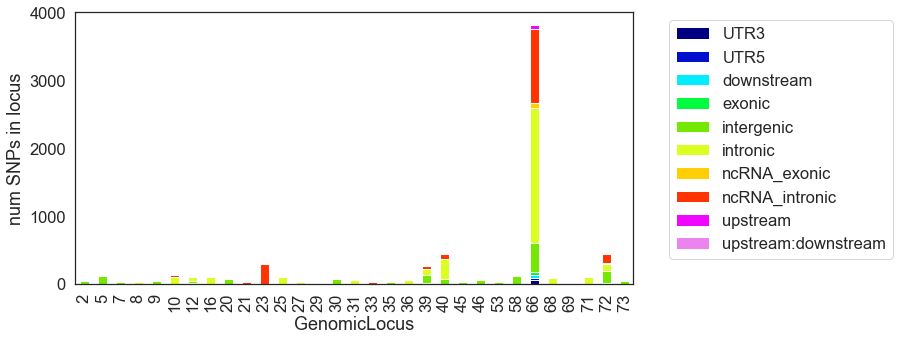

In [214]:

from matplotlib import cm
my_colors = cm.gist_ncar(np.linspace(0,1, len(FUMA_percent.columns)))
# shuffle the order
# np.random.shuffle(my_colors)

plt.figure()
FUMA_percent.plot(
    x = 'GenomicLocus',
    kind = 'bar',
    stacked = True,
    title = '',
    mark_right = True,
legend=True,color=my_colors,
    figsize=(10,5))

plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('num SNPs in locus')

uniqID  chr        pos         rsID non_effect_allele  \
rsID                                                                          
rs13014235   2:202215492:C:G    2  202215492   rs13014235                 G   
rs2244438    2:202252539:A:G    2  202252539    rs2244438                 G   
rs29230       6:29576393:A:G    6   29576393      rs29230                 G   
rs29225       6:29581041:A:G    6   29581041      rs29225                 G   
rs17854217    6:29581110:A:G    6   29581110   rs17854217                 G   
...                      ...  ...        ...          ...               ...   
rs199913382  17:44625866:A:C   17   44625866  rs199913382                 C   
rs199533     17:44828931:A:G   17   44828931     rs199533                 G   
rs141361512  18:33785083:A:G   18   33785083  rs141361512                 G   
rs671650      20:3669165:G:T   20    3669165     rs671650                 T   
rs709020      20:3675136:A:G   20    3675136     rs709020                 G   

            effect_allele       MAF     gwasP  GenomicLocus      nearestGene  \
rsID                                                                           
rs13014235              C  0.394600  0.000019            12         ALS2CR12   
rs2244438               A  0.314100  0.000233            12            TRAK2   
rs29230                 A  0.153100  0.010480            31           GABBR1   
rs29225                 A  0.097420  0.000002            31           GABBR1   
rs17854217              A  0.097420  0.000002            31           GABBR1   
...                   ...       ...       ...           ...              ...   
rs199913382             A  0.244500  0.000008            66  LRRC37A2:ARL17A   
rs199533                A  0.222700  0.000041            66              NSF   
rs141361512             A  0.005964  0.000011            67            MOCOS   
rs671650                G  0.014910       NaN            70          SIGLEC1   
rs709020                A  0.014910       NaN            70          SIGLEC1   

            dist    func    CADD  RDB  minChrState  commonChrState   negLogP  
rsID                                                                          
rs13014235     0  exonic   3.445    6            4               5  4.732359  
rs2244438      0  exonic  16.860    5            4               4  3.632831  
rs29230        0  exonic  12.440    6            4               4  1.979639  
rs29225        0  exonic  12.810  NaN            4               4  5.667966  
rs17854217     0  exonic   0.530    5            4               4  5.667966  
...          ...     ...     ...  ...          ...             ...       ...  
rs199913382  0:0  exonic  19.030    7            5              15  5.093827  
rs199533       0  exonic  11.260  NaN            4               4  4.389766  
rs141361512    0  exonic   1.889    5            4              15  4.958607  
rs671650       0  exonic   1.524    4            1              15       NaN  
rs709020       0  exonic  11.040    5            5              15       NaN  

[62 rows x 17 columns]

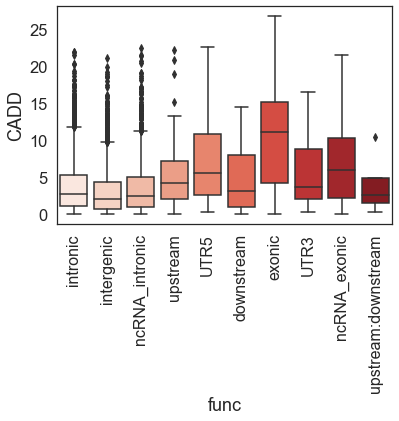

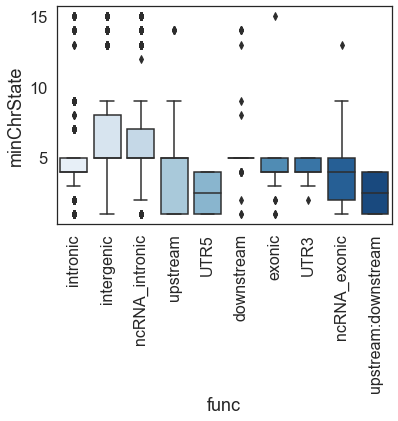

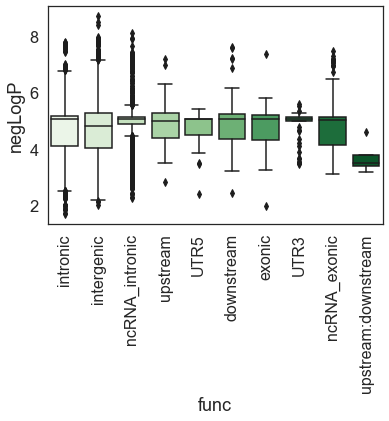

In [215]:
# all LOCI
focal_FUMA=FUMA_SNPs_df #[FUMA_SNPs_df['GenomicLocus']==focal_genLoc]
sns.boxplot(data=focal_FUMA,x='func',y='CADD',palette='Reds')
plt.xticks(rotation='vertical',fontsize=16)

plt.figure()
sns.boxplot(data=focal_FUMA,x='func',y='minChrState',palette='Blues')
plt.xticks(rotation='vertical',fontsize=16)

plt.figure()
sns.boxplot(data=focal_FUMA,x='func',y='negLogP',palette='Greens')
plt.xticks(rotation='vertical',fontsize=16)


focal_FUMA[focal_FUMA['func']=='exonic']

3820


uniqID  chr       pos            rsID  \
rsID                                                             
rs12949256      17:43507297:C:T   17  43507297      rs12949256   
rs7220206       17:43507403:A:G   17  43507403       rs7220206   
rs1879581       17:43545893:C:T   17  43545893       rs1879581   
rs71238846      17:43552537:A:G   17  43552537      rs71238846   
rs147243132     17:43552717:C:G   17  43552717     rs147243132   
rs71227520      17:43552812:A:G   17  43552812      rs71227520   
rs12452273      17:43552921:C:T   17  43552921      rs12452273   
rs34283254      17:43902861:A:C   17  43902861      rs34283254   
rs16940665      17:43907896:C:T   17  43907896      rs16940665   
rs16940674      17:43910507:C:T   17  43910507      rs16940674   
rs16940681      17:43912159:C:G   17  43912159      rs16940681   
rs62621252      17:43922942:C:T   17  43922942      rs62621252   
rs62054815      17:43923266:A:G   17  43923266      rs62054815   
rs12185233      17:43923654:C:G   17  43923654      rs12185233   
rs12185268      17:43923683:A:G   17  43923683      rs12185268   
rs12185235      17:43923703:C:T   17  43923703      rs12185235   
rs11079725      17:43923934:C:T   17  43923934      rs11079725   
rs12373123      17:43924073:C:T   17  43924073      rs12373123   
rs12373139      17:43924130:A:G   17  43924130      rs12373139   
rs12373142      17:43924200:C:G   17  43924200      rs12373142   
rs12373124      17:43924219:C:T   17  43924219      rs12373124   
rs12373140      17:43924231:A:G   17  43924231      rs12373140   
rs754512        17:44055647:A:T   17  44055647        rs754512   
rs63750417      17:44060775:C:T   17  44060775      rs63750417   
rs62063786      17:44061023:A:G   17  44061023      rs62063786   
rs62063787      17:44061036:C:T   17  44061036      rs62063787   
rs17651549      17:44061278:C:T   17  44061278      rs17651549   
rs10445337      17:44067400:C:T   17  44067400      rs10445337   
rs1052551       17:44068924:A:G   17  44068924       rs1052551   
rs62063845      17:44071294:C:T   17  44071294      rs62063845   
rs1052553       17:44073889:A:G   17  44073889       rs1052553   
rs17652121      17:44073973:C:T   17  44073973      rs17652121   
rs62063857      17:44076665:A:G   17  44076665      rs62063857   
rs34579536      17:44108906:A:G   17  44108906      rs34579536   
rs36076725      17:44110532:A:G   17  44110532      rs36076725   
rs35833914      17:44110541:A:G   17  44110541      rs35833914   
rs17574604      17:44111613:A:G   17  44111613      rs17574604   
rs34043286      17:44117119:A:G   17  44117119      rs34043286   
rs17576165      17:44159849:C:T   17  44159849      rs17576165   
chr17:44248769  17:44248769:C:T   17  44248769  chr17:44248769   
chr17:44248814  17:44248814:A:G   17  44248814  chr17:44248814   
chr17:44248837  17:44248837:C:T   17  44248837  chr17:44248837   
chr17:44249096  17:44249096:A:C   17  44249096  chr17:44249096   
chr17:44249199  17:44249199:G:T   17  44249199  chr17:44249199   
rs201223330     17:44374710:A:G   17  44374710     rs201223330   
chr17:44408004  17:44408004:A:C   17  44408004  chr17:44408004   
rs199913382     17:44625866:A:C   17  44625866     rs199913382   
rs199533        17:44828931:A:G   17  44828931        rs199533   

               non_effect_allele effect_allele     MAF     gwasP  \
rsID                                                               
rs12949256                     C             T  0.1938  0.000288   
rs7220206                      G             A  0.1938  0.000312   
rs1879581                      C             T  0.1958  0.000135   
rs71238846                     G             A  0.1958  0.000133   
rs147243132                    G             C  0.1958  0.000133   
rs71227520                     G             A  0.1819  0.000490   
rs12452273                     C             T  0.1958  0.000133   
rs34283254                     C             A  0.2396  0.000006   
rs16940665                     C            

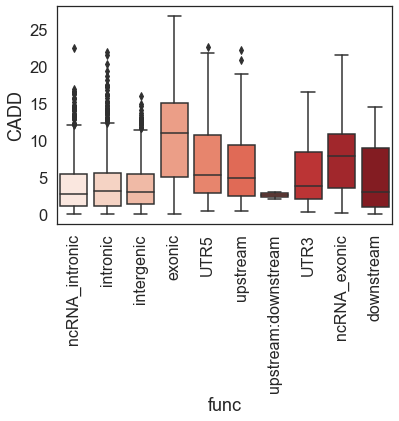

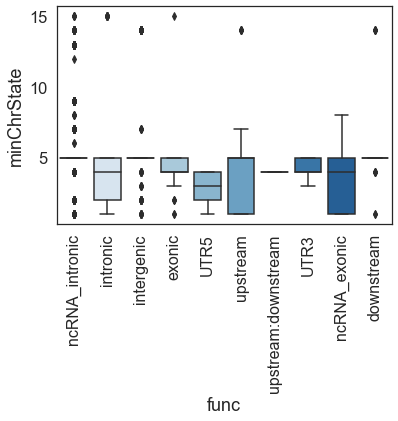

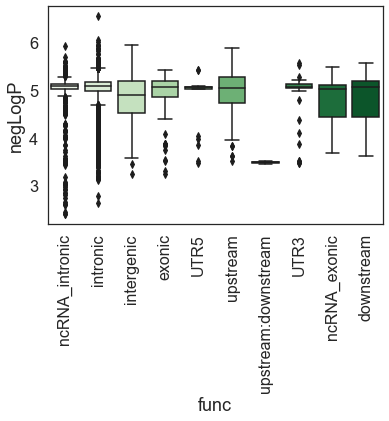

In [289]:
focal_genLoc = 66
focal_FUMA=FUMA_SNPs_df[FUMA_SNPs_df['GenomicLocus']==focal_genLoc]
sns.boxplot(data=focal_FUMA,x='func',y='CADD',palette='Reds')
plt.xticks(rotation='vertical',fontsize=16)

plt.figure()
sns.boxplot(data=focal_FUMA,x='func',y='minChrState',palette='Blues')
plt.xticks(rotation='vertical',fontsize=16)

plt.figure()
sns.boxplot(data=focal_FUMA,x='func',y='negLogP',palette='Greens')
plt.xticks(rotation='vertical',fontsize=16)

print(len(focal_FUMA))
focal_FUMA[focal_FUMA['func']=='exonic']

In [217]:
FUMA_SNPs_df.columns

Index(['uniqID', 'chr', 'pos', 'rsID', 'non_effect_allele', 'effect_allele',
       'MAF', 'gwasP', 'GenomicLocus', 'nearestGene', 'dist', 'func', 'CADD',
       'RDB', 'minChrState', 'commonChrState', 'negLogP'],
      dtype='object')

In [218]:
fuma_gwas_cat.head()

GenomicLocus   IndSigSNP  chr         bp         snp  \
snp                                                                
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs6701243              4   rs6701243    1   99092784   rs6701243   
rs11185408             5  rs11185408    1  104792257  rs11185408   

           DateAddedToCatalog      PMID        FirstAuth        Date  \
snp                                                                    
rs2391769          2019-01-29  30610198  Soler Artigas M  2019-01-04   
rs2391769          2019-04-09  30478444       Demontis D  2018-11-26   
rs2391769          2019-04-10  30804558          Grove J  2019-02-25   
rs6701243          2019-04-10  30804558          Grove J  2019-02-25   
rs11185408         2019-04-10  30804558          Grove J  2019-02-25   

                   Journal  ...                    Context intergenic RiskAF  \
snp                         ...                                                
rs2391769   Mol Psychiatry  ...  regulatory_region_variant          1     NR   
rs2391769        Nat Genet  ...  regulatory_region_variant          1     NR   
rs2391769        Nat Genet  ...  regulatory_region_variant          1  0.631   
rs6701243        Nat Genet  ...         intergenic_variant          1  0.609   
rs11185408       Nat Genet  ...         intergenic_variant          1  0.477   

                       P     Pmlog Ptext    OrBeta         95CI  \
snp                                                               
rs2391769   3.000000e-08  7.522879   NaN  1.063830  [1.04-1.09]   
rs2391769   5.000000e-07  6.301030   NaN  1.013000           NR   
rs2391769   5.000000e-07  6.301030   NaN  1.069519         [NR]   
rs6701243   1.000000e-06  6.000000   NaN  1.067000         [NR]   
rs11185408  1.000000e-06  6.000000   NaN  1.064963         [NR]   

                                                     Platform CNV  
snp                                                                
rs2391769                              NR [5009020] (imputed)   N  
rs2391769   Affymetrix, Illumina, Perlegen [8047421] (impu...   N  
rs2391769                        Illumina [9112387] (imputed)   N  
rs6701243                        Illumina [9112387] (imputed)   N  
rs11185408                       Illumina [9112387] (imputed)   N  

[5 rows x 37 columns]

In [219]:

# parse eQTL genes 
fuma_eqtl = pd.read_csv(basedir+'/eqtl.txt',sep='\t')
fuma_eqtl.index=fuma_eqtl['uniqID']

display(fuma_eqtl.head())

fuma_gwas_cat = pd.read_csv(basedir+'/gwascatalog.txt',sep='\t')
fuma_gwas_cat.index=fuma_gwas_cat['snp']
display(fuma_gwas_cat.head())

FUMA_annot_df = pd.DataFrame()
for focal_loc in FUMA_SNPs_df['GenomicLocus'].value_counts().index.tolist(): # loop over genomic loci
    print(focal_loc)
    focal_df = FUMA_SNPs_df[FUMA_SNPs_df['GenomicLocus']==focal_loc]
    print(len(focal_df))

    # check if there are any eQTLs
    focal_fuma_id=focal_df['uniqID'].tolist()
    if len(np.intersect1d(focal_fuma_id,fuma_eqtl.index.tolist()))>0:
        focal_df.index=focal_fuma_id
        focal_eqtl=fuma_eqtl.loc[list(np.intersect1d(focal_fuma_id,fuma_eqtl.index.tolist()))].sort_values('p')
        print(len(focal_eqtl))
        focal_eqtl = focal_eqtl[~focal_eqtl.index.duplicated(keep='first')] # take just the top eqtl
        print(len(focal_eqtl))
        focal_df['top_eQTL_pval'] = focal_eqtl['p']
        focal_df['top_eQTL_tissue']=focal_eqtl['tissue']
        focal_df['top_eQTL_gene']=focal_eqtl['symbol']
        
        # just take one tissue of interest (here Brain_Cerebellar_Hemisphere)
        focal_eqtl = fuma_eqtl.loc[list(np.intersect1d(focal_fuma_id,fuma_eqtl.index.tolist()))]
        focal_eqtl = focal_eqtl[focal_eqtl['tissue']=='Brain_Cerebellar_Hemisphere']
        focal_eqtl = focal_eqtl[['p','symbol']]
        focal_eqtl=focal_eqtl.sort_values('p')
        focal_eqtl = focal_eqtl[~focal_eqtl.index.duplicated(keep='first')] # take just the top eqtl
        focal_eqtl.columns=['Brain_Cerebellar_Hemisphere_eQTL_pval','Brain_Cerebellar_Hemisphere_eQTL_gene']
        focal_df = focal_df.join(focal_eqtl,how='left') # left join in focal tissue.. not all will have entries
    else:
        focal_df['top_eQTL_pval']=np.nan
        focal_df['top_eQTL_tissue']=np.nan
        focal_df['top_eQTL_gene']=np.nan
        focal_df['Brain_Cerebellar_Hemisphere_eQTL_pval']=np.nan
        focal_df['Brain_Cerebellar_Hemisphere_eQTL_gene']=np.nan
        
        
    # check if there are any prior hits in GWAS catalog
    focal_fuma_id=focal_df.index.tolist()
    if len(np.intersect1d(focal_fuma_id,fuma_gwas_cat.index.tolist()))>0:
        focal_df.index=focal_fuma_id
        focal_gwas_cat=fuma_gwas_cat.loc[list(np.intersect1d(focal_fuma_id,fuma_gwas_cat.index.tolist()))].sort_values('P')
        print(len(focal_gwas_cat))
        focal_gwas_cat = focal_gwas_cat[~focal_gwas_cat.index.duplicated(keep='first')] # take just the top gwas_cat
        print(len(focal_gwas_cat))
        focal_df['top_gwas_cat_pval'] = focal_gwas_cat['P']
        focal_df['top_gwas_cat_trait']=focal_gwas_cat['Trait']
        focal_df['top_gwas_cat_PMID']=focal_gwas_cat['PMID']
        focal_df['top_gwas_cat_context']=focal_gwas_cat['Context']
        

    FUMA_annot_df = FUMA_annot_df.append(focal_df)

print(len(FUMA_annot_df))
display(FUMA_annot_df.head())



# cred_set_df.index=cred_set_df['rsID']

# cred_set_df.to_csv('../tables/TGHDL_cred_set_annotations/'+focal_loc+'_cred_set.txt',sep='\t')

/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


uniqID           db             tissue  \
uniqID                                                             
1:99118034:G:T    1:99118034:G:T  PsychENCODE  PsychENCODE_eQTLs   
1:99128559:C:G    1:99128559:C:G  PsychENCODE  PsychENCODE_eQTLs   
1:99130265:C:T    1:99130265:C:T  PsychENCODE  PsychENCODE_eQTLs   
1:99134647:A:G    1:99134647:A:G  PsychENCODE  PsychENCODE_eQTLs   
1:147167225:A:C  1:147167225:A:C  PsychENCODE  PsychENCODE_eQTLs   

                            gene testedAllele         p  signed_stats  \
uniqID                                                                  
1:99118034:G:T   ENSG00000117598            G  0.000349     -0.038995   
1:99128559:C:G   ENSG00000117598            G  0.000346     -0.039014   
1:99130265:C:T   ENSG00000117598            C  0.000337     -0.039062   
1:99134647:A:G   ENSG00000117598            G  0.000321     -0.039171   
1:147167225:A:C  ENSG00000162836            A  0.000228     -0.166454   

                      FDR RiskIncAllele alignedDirection  chr        pos  \
uniqID                                                                     
1:99118034:G:T   0.024500             T                +    1   99118034   
1:99128559:C:G   0.024359             C                +    1   99128559   
1:99130265:C:T   0.023823             T                +    1   99130265   
1:99134647:A:G   0.022848             A                +    1   99134647   
1:147167225:A:C  0.017139             C                +    1  147167225   

                symbol  eqtlMapFilt  
uniqID                               
1:99118034:G:T   LPPR5            1  
1:99128559:C:G   LPPR5            1  
1:99130265:C:T   LPPR5            1  
1:99134647:A:G   LPPR5            1  
1:147167225:A:C   ACP6            1

GenomicLocus   IndSigSNP  chr         bp         snp  \
snp                                                                
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs2391769              3   rs2391769    1   96978961   rs2391769   
rs6701243              4   rs6701243    1   99092784   rs6701243   
rs11185408             5  rs11185408    1  104792257  rs11185408   

           DateAddedToCatalog      PMID        FirstAuth        Date  \
snp                                                                    
rs2391769          2019-01-29  30610198  Soler Artigas M  2019-01-04   
rs2391769          2019-04-09  30478444       Demontis D  2018-11-26   
rs2391769          2019-04-10  30804558          Grove J  2019-02-25   
rs6701243          2019-04-10  30804558          Grove J  2019-02-25   
rs11185408         2019-04-10  30804558          Grove J  2019-02-25   

                   Journal  ...                    Context intergenic RiskAF  \
snp                         ...                                                
rs2391769   Mol Psychiatry  ...  regulatory_region_variant          1     NR   
rs2391769        Nat Genet  ...  regulatory_region_variant          1     NR   
rs2391769        Nat Genet  ...  regulatory_region_variant          1  0.631   
rs6701243        Nat Genet  ...         intergenic_variant          1  0.609   
rs11185408       Nat Genet  ...         intergenic_variant          1  0.477   

                       P     Pmlog Ptext    OrBeta         95CI  \
snp                                                               
rs2391769   3.000000e-08  7.522879   NaN  1.063830  [1.04-1.09]   
rs2391769   5.000000e-07  6.301030   NaN  1.013000           NR   
rs2391769   5.000000e-07  6.301030   NaN  1.069519         [NR]   
rs6701243   1.000000e-06  6.000000   NaN  1.067000         [NR]   
rs11185408  1.000000e-06  6.000000   NaN  1.064963         [NR]   

                                                     Platform CNV  
snp                                                                
rs2391769                              NR [5009020] (imputed)   N  
rs2391769   Affymetrix, Illumina, Perlegen [8047421] (impu...   N  
rs2391769                        Illumina [9112387] (imputed)   N  
rs6701243                        Illumina [9112387] (imputed)   N  
rs11185408                       Illumina [9112387] (imputed)   N  

[5 rows x 37 columns]

66
3820
343641
3350


/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

72
456
129
126
40
451
1935
394
23
296


/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

17
10
39
271
333
161
10
128
26
26
5
123
1
1
58
122
16
108
716
99
12
106
1017
96
71
106
2
2
68
102
2
2
25
96
3
3
20
75
8
8
30
66
1
1
31
65
482
62
46
64
36
60
34
34
2
43
73
43
4
4
9
39
69
37
36
14
7
35
1
1
33
34
35
14
8
32
21
21
53
29
27
28
3
3
21
27
8
3
35
25
45
22
18
7
29
21
10
4
19
19
34
18
1
1
15
15
57
12
4
12
4
4
42
12
37
11
1
1
56
10
54
10
64
9
14
9
7
3
22
9
1
1
1
8
32
7
70
7
49
7
1
1
41
6
3
6
3
1
6
6
2
2
38
6
67
4
1
1
24
4
1
1
65
4
12
3
74
3
52
3
51
3
50
2
1
1
11
2
43
2
63
2
39
2
59
2
55
2
44
2
1
1
13
1
1
1
28
1
47
1
1
1
26
1
17
1
1
1
62
1
60
1
1
1
61
1
18
1
48
1
7174


uniqID  chr       pos         rsID  \
17:43285193:C:CA  17:43285193:C:CA   17  43285193  rs201228834   
17:43285691:A:C    17:43285691:A:C   17  43285691   rs11870777   
17:43287642:G:T    17:43287642:G:T   17  43287642   rs62066714   
17:43288110:A:C    17:43288110:A:C   17  43288110   rs12603585   
17:43288222:A:G    17:43288222:A:G   17  43288222   rs12603483   

                 non_effect_allele effect_allele     MAF     gwasP  \
17:43285193:C:CA                CA             C  0.3817  0.000836   
17:43285691:A:C                  C             A  0.3946  0.001163   
17:43287642:G:T                  G             T  0.3817  0.000922   
17:43288110:A:C                  C             A  0.3827  0.000923   
17:43288222:A:G                  G             A  0.3827  0.000923   

                  GenomicLocus    nearestGene  ...   negLogP top_eQTL_pval  \
17:43285193:C:CA            66  CTD-2020K17.1  ...  3.077898           NaN   
17:43285691:A:C             66  CTD-2020K17.1  ...  2.934420  4.177800e-05   
17:43287642:G:T             66  CTD-2020K17.1  ...  3.035034  4.813140e-05   
17:43288110:A:C             66  CTD-2020K17.1  ...  3.034657  1.306320e-07   
17:43288222:A:G             66  CTD-2020K17.1  ...  3.034657  1.012810e-08   

                    top_eQTL_tissue top_eQTL_gene  \
17:43285193:C:CA                NaN           NaN   
17:43285691:A:C    Brain_Cerebellum        SPPL2C   
17:43287642:G:T    Brain_Cerebellum        SPPL2C   
17:43288110:A:C   PsychENCODE_eQTLs          MAPT   
17:43288222:A:G   PsychENCODE_eQTLs          MAPT   

                  Brain_Cerebellar_Hemisphere_eQTL_pval  \
17:43285193:C:CA                                    NaN   
17:43285691:A:C                                     NaN   
17:43287642:G:T                                     NaN   
17:43288110:A:C                                     NaN   
17:43288222:A:G                                     NaN   

                  Brain_Cerebellar_Hemisphere_eQTL_gene  top_gwas_cat_pval  \
17:43285193:C:CA                                    NaN                NaN   
17:43285691:A:C                                     NaN                NaN   
17:43287642:G:T                                     NaN                NaN   
17:43288110:A:C                                     NaN                NaN   
17:43288222:A:G                                     NaN                NaN   

                  top_gwas_cat_trait top_gwas_cat_PMID top_gwas_cat_context  
17:43285193:C:CA                 NaN               NaN                  NaN  
17:43285691:A:C                  NaN               NaN                  NaN  
17:43287642:G:T                  NaN               NaN                  NaN  
17:43288110:A:C                  NaN               NaN                  NaN  
17:43288222:A:G                  NaN               NaN                  NaN  

[5 rows x 26 columns]

In [220]:
FUMA_annot_df.dropna(subset=['top_eQTL_pval'])

uniqID  chr        pos         rsID  \
17:43285691:A:C  17:43285691:A:C   17   43285691   rs11870777   
17:43287642:G:T  17:43287642:G:T   17   43287642   rs62066714   
17:43288110:A:C  17:43288110:A:C   17   43288110   rs12603585   
17:43288222:A:G  17:43288222:A:G   17   43288222   rs12603483   
17:43292035:C:G  17:43292035:C:G   17   43292035   rs55706568   
...                          ...  ...        ...          ...   
1:147183927:C:T  1:147183927:C:T    1  147183927   rs78653484   
16:72097225:C:T  16:72097225:C:T   16   72097225   rs12918905   
16:72097230:C:G  16:72097230:C:G   16   72097230   rs12917768   
16:72097279:C:T  16:72097279:C:T   16   72097279   rs28731397   
10:65421442:A:G  10:65421442:A:G   10   65421442  rs141319505   

                non_effect_allele effect_allele      MAF     gwasP  \
17:43285691:A:C                 C             A  0.39460  0.001163   
17:43287642:G:T                 G             T  0.38170  0.000922   
17:43288110:A:C                 C             A  0.38270  0.000923   
17:43288222:A:G                 G             A  0.38270  0.000923   
17:43292035:C:G                 G             C  0.41550  0.000019   
...                           ...           ...      ...       ...   
1:147183927:C:T                 C             T  0.05070  0.000005   
16:72097225:C:T                 C             T  0.27140  0.001586   
16:72097230:C:G                 G             C  0.27040  0.001441   
16:72097279:C:T                 C             T  0.29130  0.000841   
10:65421442:A:G                 G             A  0.03082  0.000002   

                 GenomicLocus    nearestGene  ...   negLogP top_eQTL_pval  \
17:43285691:A:C            66  CTD-2020K17.1  ...  2.934420  4.177800e-05   
17:43287642:G:T            66  CTD-2020K17.1  ...  3.035034  4.813140e-05   
17:43288110:A:C            66  CTD-2020K17.1  ...  3.034657  1.306320e-07   
17:43288222:A:G            66  CTD-2020K17.1  ...  3.034657  1.012810e-08   
17:43292035:C:G            66  CTD-2020K17.1  ...  4.723538  1.318410e-13   
...                       ...            ...  ...       ...           ...   
1:147183927:C:T             6  RP11-533N14.3  ...  5.330218  1.595970e-08   
16:72097225:C:T            65     TXNL4B:HPR  ...  2.799697  4.279510e-34   
16:72097230:C:G            65     TXNL4B:HPR  ...  2.841336  1.440790e-33   
16:72097279:C:T            65     TXNL4B:HPR  ...  3.075256  9.941190e-35   
10:65421442:A:G            50  RP11-170M17.1  ...  5.726767  5.293190e-08   

                   top_eQTL_tissue top_eQTL_gene  \
17:43285691:A:C   Brain_Cerebellum        SPPL2C   
17:43287642:G:T   Brain_Cerebellum        SPPL2C   
17:43288110:A:C  PsychENCODE_eQTLs          MAPT   
17:43288222:A:G  PsychENCODE_eQTLs          MAPT   
17:43292035:C:G  PsychENCODE_eQTLs          MAPT   
...                            ...           ...   
1:147183927:C:T  PsychENCODE_eQTLs          ACP6   
16:72097225:C:T  PsychENCODE_eQTLs           HPR   
16:72097230:C:G  PsychENCODE_eQTLs           HPR   
16:72097279:C:T  PsychENCODE_eQTLs           HPR   
10:65421442:A:G  PsychENCODE_eQTLs         NRBF2   

                 Brain_Cerebellar_Hemisphere_eQTL_pval  \
17:43285691:A:C                                    NaN   
17:43287642:G:T                                    NaN   
17:43288110:A:C                                    NaN   
17:43288222:A:G                                    NaN   
17:43292035:C:G                               0.000046   
...                                                ...   
1:147183927:C:T                                    NaN   
16:72097225:C:T                                    NaN   
16:72097230:C:G                                    NaN   
16:72097279:C:T                                    NaN   
10:65421442:A:G                                    NaN   

                 Brain_Cerebellar_Hemisphere_eQTL_gene  top_gwas_cat_pval  \
17:43285691:A:C                                    NaN                NaN   
17:

In [221]:
FUMA_annot_df.dropna(subset=['top_gwas_cat_pval'])

uniqID  chr        pos         rsID non_effect_allele  \
rs6869862    5:103886213:G:T    5  103886213    rs6869862                 G   
rs13177365   5:103914543:A:G    5  103914543   rs13177365                 G   
rs2431112    5:103931707:A:G    5  103931707    rs2431112                 G   
rs12187898   5:103939674:C:T    5  103939674   rs12187898                 C   
rs254024     5:103944020:G:T    5  103944020     rs254024                 G   
...                      ...  ...        ...          ...               ...   
rs10110094   8:131472047:A:G    8  131472047   rs10110094                 G   
rs148587110   3:20641966:C:T    3   20641966  rs148587110                 C   
rs45595836   10:16691399:C:T   10   16691399   rs45595836                 C   
rs79940520   3:191838169:A:G    3  191838169   rs79940520                 G   
rs77691144   13:66970212:C:T   13   66970212   rs77691144                 C   

            effect_allele      MAF         gwasP  GenomicLocus  nearestGene  \
rs6869862               T  0.45730  1.848000e-05            23  RP11-6N13.1   
rs13177365              A  0.48110  1.270000e-05            23  RP11-6N13.1   
rs2431112               A  0.42450  2.517000e-06            23  RP11-6N13.1   
rs12187898              T  0.47020  3.842000e-06            23  RP11-6N13.1   
rs254024                T  0.42150  6.415000e-06            23  RP11-6N13.1   
...                   ...      ...           ...           ...          ...   
rs10110094              A  0.14510  2.050000e-06            44        ASAP1   
rs148587110             T  0.01491  7.400000e-06            13    RNU6-815P   
rs45595836              T  0.09344  3.131000e-07            47         RSU1   
rs79940520              A  0.14810  4.260000e-06            17        FGF12   
rs77691144              T  0.03181  1.910000e-06            60        PCDH9   

             ...   negLogP top_eQTL_pval  top_eQTL_tissue top_eQTL_gene  \
rs6869862    ...  4.733298           NaN              NaN           NaN   
rs13177365   ...  4.896196           NaN              NaN           NaN   
rs2431112    ...  5.599117           NaN              NaN           NaN   
rs12187898   ...  5.415443           NaN              NaN           NaN   
rs254024     ...  5.192803           NaN              NaN           NaN   
...          ...       ...           ...              ...           ...   
rs10110094   ...  5.688246           NaN              NaN           NaN   
rs148587110  ...  5.130768           NaN              NaN           NaN   
rs45595836   ...  6.504317           NaN              NaN           NaN   
rs79940520   ...  5.370590           NaN              NaN           NaN   
rs77691144   ...  5.718967           NaN              NaN           NaN   

             Brain_Cerebellar_Hemisphere_eQTL_pval  \
rs6869862                                      NaN   
rs13177365                                     NaN   
rs2431112                                      NaN   
rs12187898                                     NaN   
rs254024                                       NaN   
...                                            ...   
rs10110094                                     NaN   
rs148587110                                    NaN   
rs45595836                                     NaN   
rs79940520                                     NaN   
rs77691144                                     NaN   

             Brain_Cerebellar_Hemisphere_eQTL_gene  top_gwas_cat_pval  \
rs6869862                                      NaN       4.000000e-12   
rs13177365                                     NaN       7.000000e-12   
rs2431112                                      NaN       2.000000e-15   
rs12187898                                     NaN       2.000000e-12   
rs254024                                       NaN       1.000000e-11   
...                                            ...                ...   
rs10110094                                     NaN       8.0000

# Summarize mapped GWAS catalog traits

(25, 37)


/Users/brinrosenthal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


top_gwas_cat_trait  Alcohol consumption (drinks per week)  \
GenomicLocus                                                
3                                                     NaN   
5                                                     NaN   
7                                                     NaN   
13                                                    NaN   
14                                                    NaN   

top_gwas_cat_trait  Alcohol consumption (drinks per week) (MTAG)  \
GenomicLocus                                                       
3                                                            NaN   
5                                                            NaN   
7                                                            NaN   
13                                                           NaN   
14                                                           NaN   

top_gwas_cat_trait  Attention deficit hyperactivity disorder or cannabis use  \
GenomicLocus                                                                   
3                                                                 1.0          
5                                                                 NaN          
7                                                                 NaN          
13                                                                NaN          
14                                                                NaN          

top_gwas_cat_trait  Autism  Autism and educational attainment (MTAG)  \
GenomicLocus                                                           
3                      NaN                                       NaN   
5                      NaN                                       NaN   
7                      NaN                                       NaN   
13                     NaN                                       NaN   
14                     NaN                                       1.0   

top_gwas_cat_trait  Autism and major depressive disorder (MTAG)  \
GenomicLocus                                                      
3                                                           NaN   
5                                                           NaN   
7                                                           NaN   
13                                                          NaN   
14                                                          NaN   

top_gwas_cat_trait  Autism spectrum disorder  \
GenomicLocus                                   
3                                        NaN   
5                                        1.0   
7                                        1.0   
13                                       1.0   
14                                       NaN   

top_gwas_cat_trait  Autism spectrum disorder or schizophrenia  Balding type 1  \
GenomicLocus                                                                    
3                                                         NaN             NaN   
5                                                         NaN             NaN   
7                                                         NaN             NaN   
13                                                        NaN             NaN   
14                                                        NaN             NaN   

top_gwas_cat_trait  Blood protein levels  ...  \
GenomicLocus                              ...   
3                                    NaN  ...   
5                                    NaN  ...   
7                                    NaN  ...   
13                                   NaN  ...   
14                                   NaN  ...   

top_gwas_cat_trait  Orofacial clefts (maternal alcohol consumption interaction)  \
GenomicLocus                                                                      
3                                                                 NaN             
5                                                            

<Figure size 432x288 with 0 Axes>

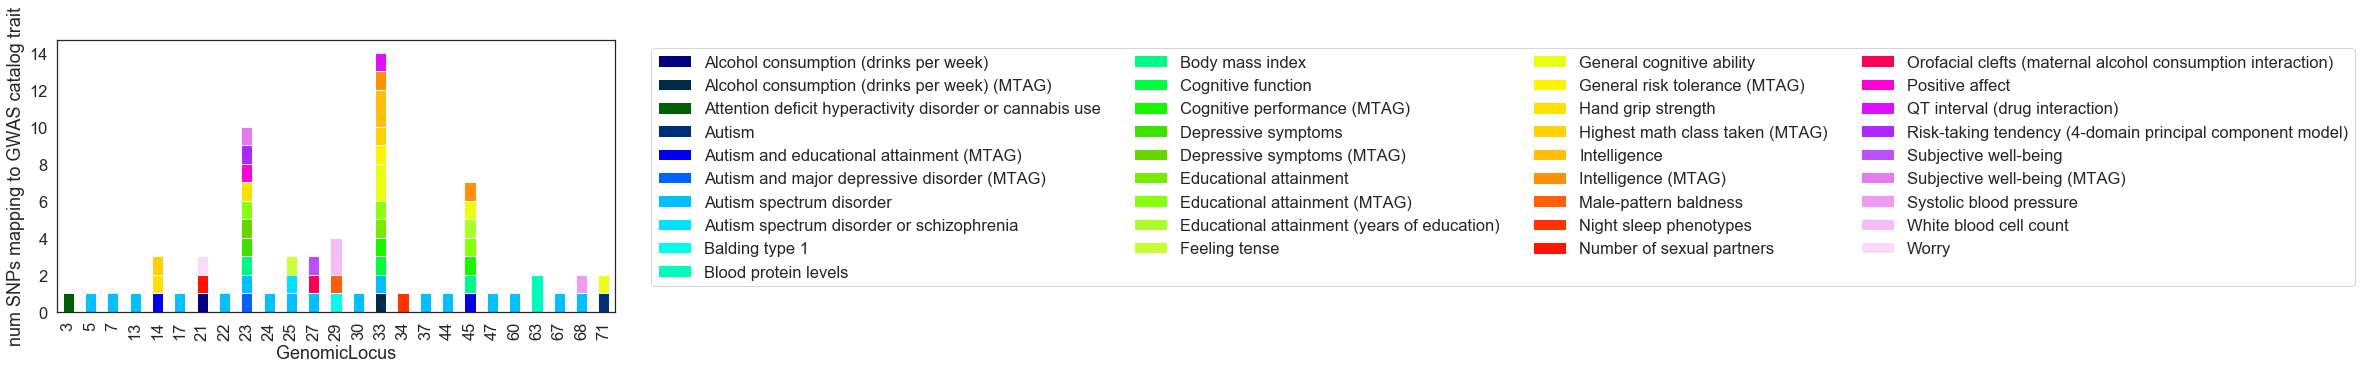

<Figure size 432x288 with 0 Axes>

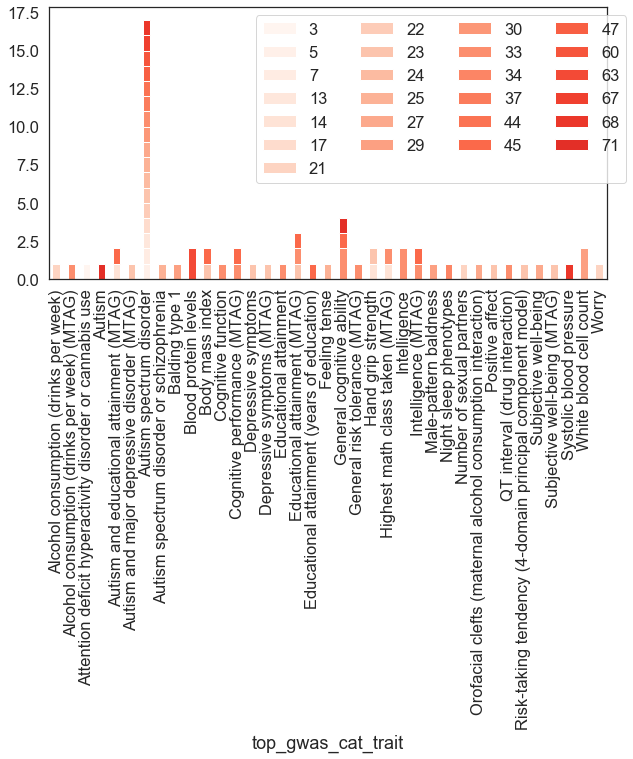

In [222]:
FUMA_annot_plot = FUMA_annot_df[['GenomicLocus','top_gwas_cat_trait']]
FUMA_annot_plot['values']=1
# FUMA_annot_plot=FUMA_annot_plot.pivot(index='GenomicLocus', columns='func')['value']
# FUMA_annot_plot = FUMA_annot_plot.divide(FUMA_annot_plot.sum(axis=1),axis='rows')


FUMA_annot_plot=pd.pivot_table(FUMA_annot_plot, index='top_gwas_cat_trait',columns='GenomicLocus',
               aggfunc='count')

# filter by loci with > 20 SNPs
FUMA_annot_plot = FUMA_annot_plot.T
FUMA_annot_plot = FUMA_annot_plot[FUMA_annot_plot.T.sum()>0]

# FUMA_annot_plot = FUMA_annot_plot.T
# FUMA_annot_plot = FUMA_annot_plot.T.divide(FUMA_annot_plot.T.sum(axis=1),axis='rows')
FUMA_annot_plot=FUMA_annot_plot.droplevel(level=0)
print(FUMA_annot_plot.shape)

FUMA_annot_plot['GenomicLocus']=FUMA_annot_plot.index.tolist()
display(FUMA_annot_plot.head())



from matplotlib import cm
my_colors = cm.gist_ncar(np.linspace(0,1, len(FUMA_annot_plot.columns)))
# shuffle the order
# np.random.shuffle(my_colors)

plt.figure()
FUMA_annot_plot.plot(
    x = 'GenomicLocus',
    kind = 'bar',
    stacked = True,
    title = '',
    mark_right = True,
legend=True,color=my_colors,
    figsize=(10,5))

plt.legend(bbox_to_anchor=(1.05,1),ncol=4)
plt.ylabel('num SNPs mapping to GWAS catalog trait')



# ------- plot it the other way -------
FUMA_annot_plot = FUMA_annot_plot.drop(columns=['GenomicLocus']).T

FUMA_annot_plot['top_gwas_cat_trait']=FUMA_annot_plot.index.tolist()



my_colors = cm.Reds(np.linspace(0,1, len(FUMA_annot_plot)))

plt.figure()
FUMA_annot_plot.plot(
    x = 'top_gwas_cat_trait',
    kind = 'bar',
    stacked = True,
    title = '',
    mark_right = True,
legend=True,color=my_colors,
    figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05,1),ncol=4)

In [288]:
ASD_GWAS_cat_genes = FUMA_annot_df['nearestGene'][FUMA_annot_df['top_gwas_cat_trait']=='Autism spectrum disorder'].tolist()
ASD_GWAS_cat_genes

['RP11-6N13.1',
 'FTLP17',
 'NEDD4L',
 'GALNT10',
 'SPTLC1P2',
 'RP11-21J7.1',
 'RP11-436D23.1',
 'ADTRP',
 'KMT2E:CTB-152G17.6',
 'CTC-458G6.2',
 'GALNT1',
 'KCNN2',
 'ASAP1',
 'RNU6-815P',
 'RSU1',
 'FGF12',
 'PCDH9']

# Plot mapped genes per locus

For mapped genes, two scores of intolerance to functional mutations are annotated; probability of being loss-of-function intolerant (pLI)58 and non-coding residual variation intolerance score (ncRVIS)59.

TODO: improve gene labeling

In [235]:
FUMA_genes_df = pd.read_csv(basedir+'genes.txt',sep='\t')
FUMA_genes_df.head()

ensg         symbol  chr      start        end  strand  \
0  ENSG00000162599           NFIA    1   61330931   61928465       1   
1  ENSG00000237435  RP11-147C23.1    1   96403457   96488436       1   
2  ENSG00000162627           SNX7    1   99127236   99226056       1   
3  ENSG00000117598          LPPR5    1   99355806   99470588      -1   
4  ENSG00000116128           BCL9    1  147013182  147098017       1   

             type     entrezID          HUGO       pLI  ...  eqtlMapSNPs  \
0  protein_coding       4774.0          NFIA  0.999555  ...            0   
1  protein_coding  102723661.0  LOC102723661       NaN  ...            0   
2  protein_coding      51375.0          SNX7  0.028839  ...            0   
3  protein_coding     163404.0        PLPPR5  0.959898  ...            4   
4  protein_coding        607.0          BCL9  0.831846  ...            0   

   eqtlMapminP  eqtlMapminQ          eqtlMapts  eqtlDirection  ciMap ciMapts  \
0          NaN          NaN                NaN            NaN     No     NaN   
1          NaN          NaN                NaN            NaN     No     NaN   
2          NaN          NaN                NaN            NaN     No     NaN   
3     0.000321     0.022848  PsychENCODE_eQTLs              +     No     NaN   
4          NaN          NaN                NaN            NaN     No     NaN   

       minGwasP            IndSigSNPs GenomicLocus  
0  8.740000e-06           rs115833252            1  
1  3.410000e-07           rs201910565            2  
2  3.074000e-07  rs6701243;rs12759704            4  
3  4.716000e-05  rs6701243;rs12759704            4  
4  4.675000e-06            rs78653484            6  

[5 rows x 23 columns]

In [274]:
print(len(FUMA_genes_df.index.tolist()))
print(len(np.unique(FUMA_genes_df.index.tolist())))

239
238


In [280]:
len(FUMA_genes_df['symbol'].tolist())

239

238


(-0.1, 1.2)

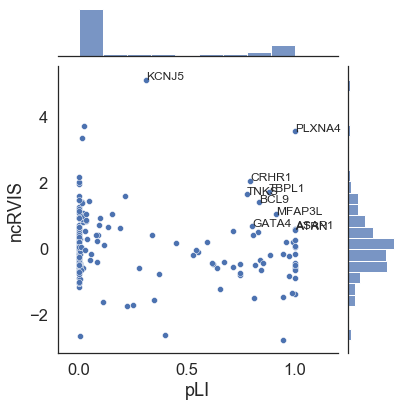

In [286]:
FUMA_genes_df.index=FUMA_genes_df['symbol'].tolist()
FUMA_genes_df = FUMA_genes_df[~FUMA_genes_df.index.duplicated(keep='first')]
jfig=sns.jointplot(x='pLI',y='ncRVIS',data=FUMA_genes_df)
# label a few
plt.sca(jfig.ax_joint)
print(len(FUMA_genes_df))
prod_temp = FUMA_genes_df['pLI']*FUMA_genes_df['ncRVIS']
for g in prod_temp.sort_values(ascending=False).head(10).index.tolist():
    plt.annotate(g,xy=(FUMA_genes_df['pLI'].loc[g],FUMA_genes_df['ncRVIS'].loc[g]),fontsize=12)
    

plt.xlim([-.1,1.2])

In [236]:
print(FUMA_genes_df.columns)

Index(['ensg', 'symbol', 'chr', 'start', 'end', 'strand', 'type', 'entrezID',
       'HUGO', 'pLI', 'ncRVIS', 'posMapSNPs', 'posMapMaxCADD', 'eqtlMapSNPs',
       'eqtlMapminP', 'eqtlMapminQ', 'eqtlMapts', 'eqtlDirection', 'ciMap',
       'ciMapts', 'minGwasP', 'IndSigSNPs', 'GenomicLocus'],
      dtype='object')


In [237]:
FUMA_genes_df.T

0                1                     2    \
ensg           ENSG00000162599  ENSG00000237435       ENSG00000162627   
symbol                    NFIA    RP11-147C23.1                  SNX7   
chr                          1                1                     1   
start                 61330931         96403457              99127236   
end                   61928465         96488436              99226056   
strand                       1                1                     1   
type            protein_coding   protein_coding        protein_coding   
entrezID                  4774      1.02724e+08                 51375   
HUGO                      NFIA     LOC102723661                  SNX7   
pLI                   0.999555              NaN             0.0288389   
ncRVIS               -0.180372              NaN                   NaN   
posMapSNPs                   8               32                    12   
posMapMaxCADD             15.1             21.1                 12.51   
eqtlMapSNPs                  0                0                     0   
eqtlMapminP                NaN              NaN                   NaN   
eqtlMapminQ                NaN              NaN                   NaN   
eqtlMapts                  NaN              NaN                   NaN   
eqtlDirection              NaN              NaN                   NaN   
ciMap                       No               No                    No   
ciMapts                    NaN              NaN                   NaN   
minGwasP              8.74e-06         3.41e-07             3.074e-07   
IndSigSNPs         rs115833252      rs201910565  rs6701243;rs12759704   
GenomicLocus                 1                2                     4   

                                3                4                  5    \
ensg                ENSG00000117598  ENSG00000116128    ENSG00000162836   
symbol                        LPPR5             BCL9               ACP6   
chr                               1                1                  1   
start                      99355806        147013182          147101453   
end                        99470588        147098017          147142618   
strand                           -1                1                 -1   
type                 protein_coding   protein_coding     protein_coding   
entrezID                     163404              607              51205   
HUGO                         PLPPR5             BCL9               ACP6   
pLI                        0.959898         0.831846         3.1441e-05   
ncRVIS                          NaN          1.39622         -0.0197645   
posMapSNPs                        0                6                  6   
posMapMaxCADD                     0            6.189              6.189   
eqtlMapSNPs                       4                0                  2   
eqtlMapminP             0.000320679              NaN        1.59597e-08   
eqtlMapminQ               0.0228485              NaN        2.87929e-06   
eqtlMapts         PsychENCODE_eQTLs              NaN  PsychENCODE_eQTLs   
eqtlDirection                     +              NaN                  +   
ciMap                            No               No                 No   
ciMapts                         NaN              NaN                NaN   
minGwasP                  4.716e-05        4.675e-06          4.675e-06   
IndSigSNPs     rs6701243;rs12759704       rs78653484         rs78653484   
GenomicLocus                      4                6                  6   

                           6                               7    \
ensg           ENSG00000143140                 ENSG00000186889   
symbol                    GJA5                          TMEM17   
chr                          1                               2   
start                147228332                        62727356   
end                  147245484                        62739029   
strand                      -1                              -1   
type       

Text(0.5, 0, 'number of genes mapped to locus')

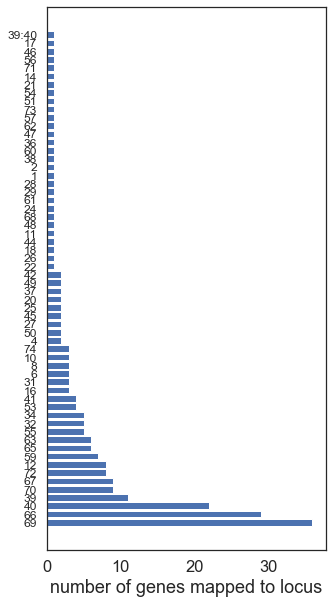

In [255]:
genes_per_locus=FUMA_genes_df['GenomicLocus'].value_counts()
plt.figure(figsize=(5,10))
plt.barh(genes_per_locus.index.tolist(),genes_per_locus.tolist())
plt.yticks(fontsize=12)
plt.xlabel('number of genes mapped to locus')

# Part 2: interactive manhattan plots

Probably implementing locus zoom? http://locuszoom.org/
https://genome.sph.umich.edu/wiki/LocusZoom_Standalone

Ideas for data integration (info pops up when SNP is clicked?):
- CADD
- Regulome DB
- List significant eQTL tissues
- Link to GTEX effect size per tissue per SNP, e.g. https://gtexportal.org/home/snp/rs738409
- GWAS catalog
- Integration with http://www.informatics.jax.org/ (maybe)



# Part 3: FUMA circos plot

https://github.com/Kyoko-wtnb/FUMA-circos-plot

Chromatin interactions. Tom will take the lead.
